# Libreries

In [2]:
import mysql.connector
import pandas as pd
import numpy as np
import os
from dotenv import load_dotenv # type: ignore # per dades accedir base dades


import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker # per poder utilitzar FuncFormatter i aplicar format a la barra
from matplotlib.ticker import FuncFormatter # per poder utilitzar el separador de milersimport geopandas as gpd

from geopy.geocoders import Nominatim
import geopandas as gpd
from shapely.geometry import Point

import time
from geopy.exc import GeocoderTimedOut

import folium
from folium.plugins import MarkerCluster
 
from tabulate import tabulate # para formato de una tabla

from sklearn.feature_extraction.text import CountVectorizer

# connectar

In [4]:

# Ruta relativa al fitxer dins del repositori Git
csv_path = os.path.join(r"..\Data\2025_04_28_Sprint03.csv")

try:
    # Carregar el CSV com a DataFrame
    df = pd.read_csv(csv_path)
    print(f"Arxiu carregat correctament: {csv_path}")
    
    # Diccionari per simular múltiples DataFrames si cal
    DataFrames = {"df2025_04_28_Sprint03": df}
    print(DataFrames.keys())
    
    # Opcional: exposar el DataFrame com a variable local
    locals().update(DataFrames)

except FileNotFoundError:
    print(f"No s'ha trobat l'arxiu: {csv_path}")
except Exception as e:
    print(f"S'ha produït un error en llegir el CSV: {e}")


Arxiu carregat correctament: ..\Data\2025_04_28_Sprint03.csv
dict_keys(['df2025_04_28_Sprint03'])


# Funciones

## Función para añadir el símbolo € a los valores del eje

In [5]:
def euro_formatter(x, pos):
    return f"{x:,.0f}€"  # Format amb 0 

## Función para formatear el eje y con separador de miles

In [6]:
def formato_miles(x, pos):
    return f'{int(x):,}'

# Establecer paleta y estilo

In [8]:
sns.set_style("darkgrid")
sns.set_palette("tab10") 

# 01 EDA centrado en Márqueting y Comunicación
    Es para un negocio de alquiler de alojamientos turísticos

## 001 Mostrar el head() de cada DataFrame cargado para ver datos

In [9]:
for table_name, df in DataFrames.items():
    print(f"Head of {table_name}:")
    print(df.head())
    print("\n")


Head of df2025_04_28_Sprint03:
   apartment_id                                               name  \
0      15248525     appt dans villa � Llansa ,beau jardin,terrasse   
1      44391173                              Hostal Escadarcs 1780   
2      32088176  Two-level apartment, wifi, terrace, swimming pool   
3      45803831                    Villa Solecito at Illes Balears   
4      43993521  Apartment Sant Lluis,2 minutes walk from the b...   

                                         description    host_id  \
0  Mon logement est proche de la plage et des com...   84213236   
1  Peque�o hostal construido de 1780, situado en ...  358199210   
2  Authentic 2 level apartment, located on the su...  240662122   
3  Villa Solecito provides a most comfortable and...  345010290   
4  Apartments located in the central part of Llor...   59318446   

      neighbourhood_name neighbourhood_district        room_type  \
0                 Llan��                    NaN  Entire home/apt   
1  Fontan

## 001-1 Selección tabla dataframe

In [12]:
df=df2025_04_28_Sprint03

## 002 Análisis Descriptivo
    Resumen descriptivo de los datos

In [13]:
print(df['city'].unique())
print(df['room_type'].value_counts())

['girona' 'menorca' 'malaga' 'sevilla' 'valencia' 'mallorca' 'barcelona'
 'madrid']
room_type
Entire home/apt    6666
Private room       2815
Hotel room           81
Shared room          71
Name: count, dtype: int64


### 002-1 Para variables numéricas

In [14]:
print(df.describe()) 

       apartment_id       host_id  accommodates    bathrooms     bedrooms  \
count  9.633000e+03  9.633000e+03   9633.000000  9567.000000  9566.000000   
mean   2.124478e+07  9.107818e+07      4.268245     1.593185     1.937173   
std    1.161495e+07  8.720254e+07      2.587081     0.988364     1.376801   
min    1.196400e+04  1.070400e+04      1.000000     0.000000     0.000000   
25%    1.334021e+07  1.512449e+07      2.000000     1.000000     1.000000   
50%    2.068392e+07  6.569780e+07      4.000000     1.000000     2.000000   
75%    3.019509e+07  1.429782e+08      6.000000     2.000000     3.000000   
max    4.806155e+07  3.874783e+08     29.000000    13.000000    50.000000   

              beds         price  minimum_nights  maximum_nights  \
count  9588.000000   9633.000000     9633.000000     9633.000000   
mean      2.923133   1035.464653        4.969480      758.946849   
std       2.266401    953.667609       17.999761      498.703391   
min       0.000000     60.000000  

### 002-2 Para detalles generales sobre el tipo de datos y valores nulos

In [15]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9633 entries, 0 to 9632
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   apartment_id                 9633 non-null   int64  
 1   name                         9630 non-null   object 
 2   description                  9497 non-null   object 
 3   host_id                      9633 non-null   int64  
 4   neighbourhood_name           9633 non-null   object 
 5   neighbourhood_district       5849 non-null   object 
 6   room_type                    9633 non-null   object 
 7   accommodates                 9633 non-null   int64  
 8   bathrooms                    9567 non-null   float64
 9   bedrooms                     9566 non-null   float64
 10  beds                         9588 non-null   float64
 11  amenities_list               9633 non-null   object 
 12  price                        9633 non-null   float64
 13  minimum_nights    

## 003 Distribución de Precios
    El precio es un factor clave para los clientes, por lo que exploramos su distribución.

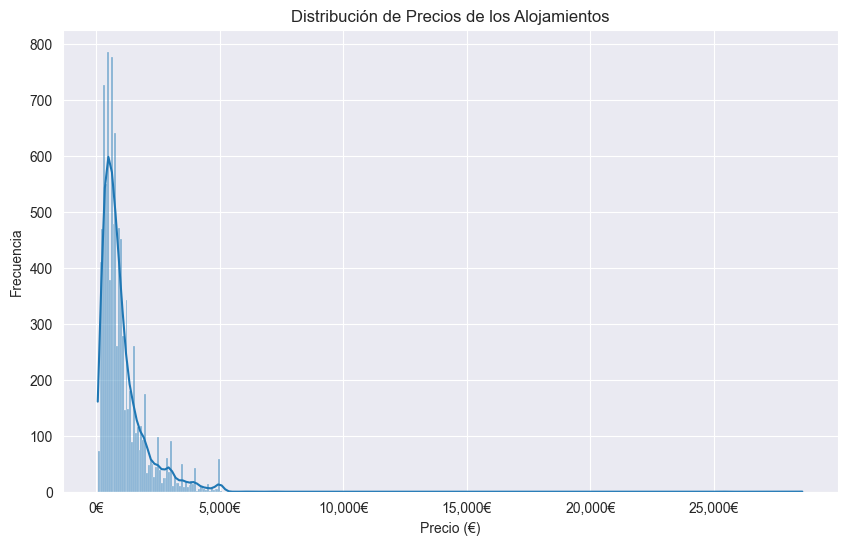

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True) #, color='blue')
plt.title('Distribución de Precios de los Alojamientos')
plt.xlabel('Precio (€)')
plt.ylabel('Frecuencia')
# Aplicar el formatter al eje X para mostrar el símbolo €
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(euro_formatter))
plt.show()

### 003-1 Distribución de Precios por Ciudad
    El precio puede variar dependiendo de la ubicación, y es importante identificar si hay ciudades más rentables que otras.

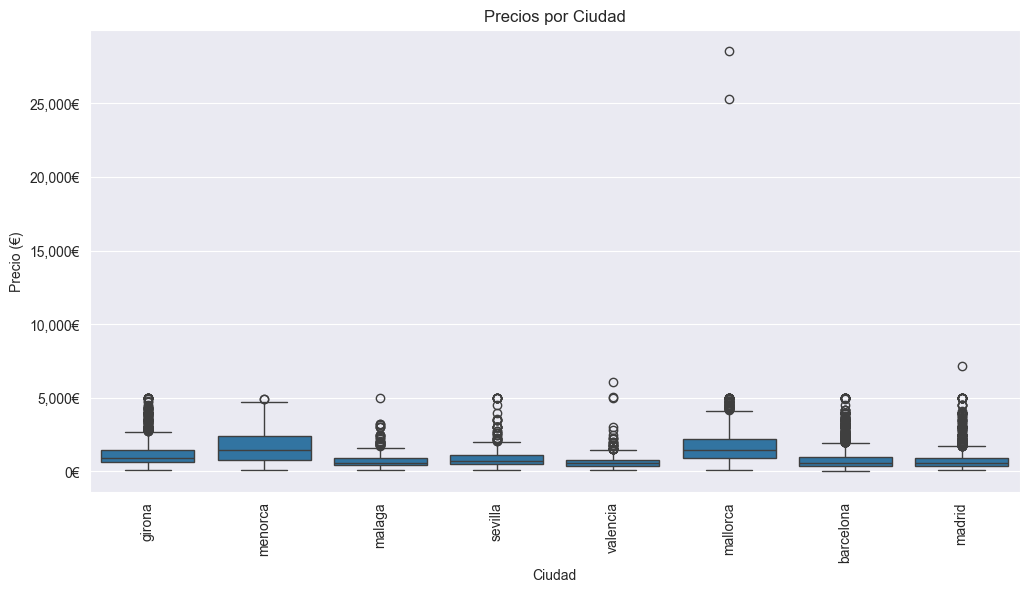

In [17]:
# Boxplot de precios por ciudad
plt.figure(figsize=(12, 6))
sns.boxplot(x='city', y='price', data=df)
plt.title('Precios por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Precio (€)')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(euro_formatter))
plt.xticks(rotation=90)
plt.show()

### 003-2 Distribución de Precios por Tipo de Alojamiento
    El tipo de alojamiento también afecta la estrategia de precios

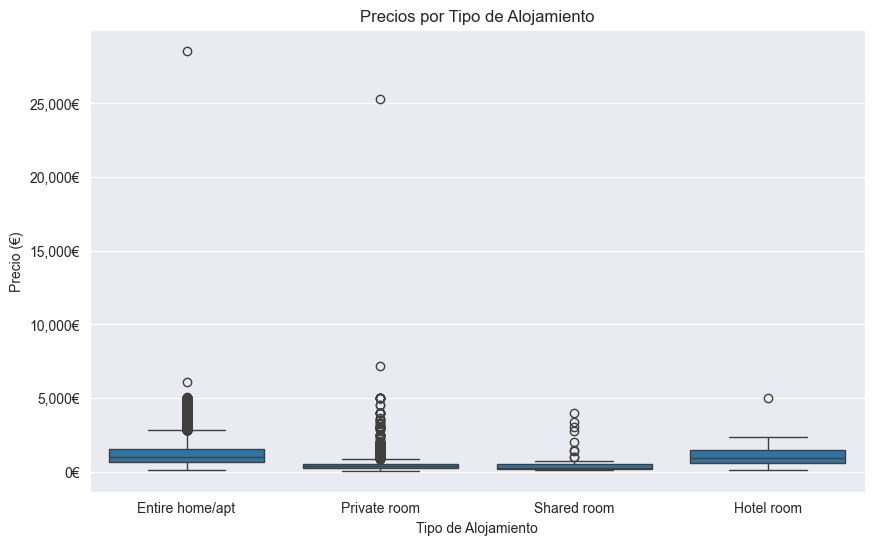

In [18]:
# Boxplot de precios por tipo de alojamiento
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Precios por Tipo de Alojamiento')
plt.xlabel('Tipo de Alojamiento')
plt.ylabel('Precio (€)')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(euro_formatter))
plt.show()

### 003-3 Distribución de Precios por Número de Camas

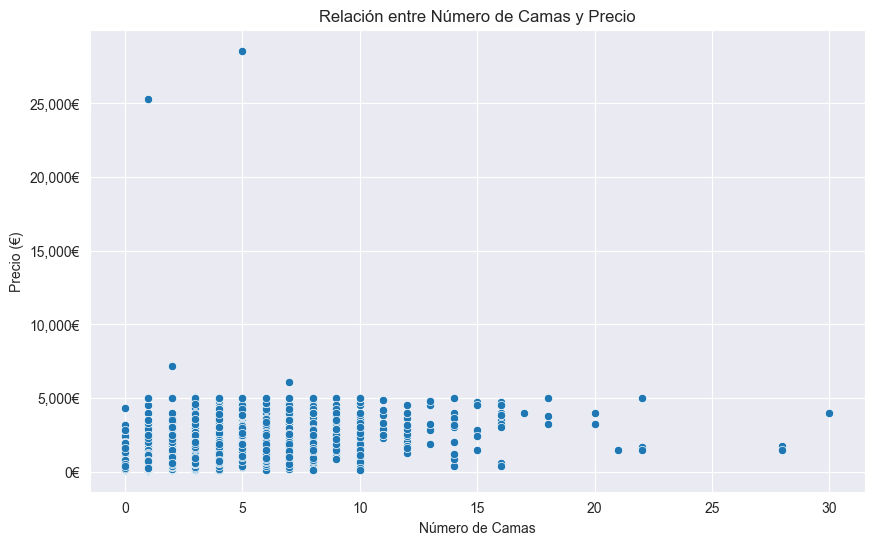

In [19]:
# Relación entre el número de camas y el precio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='beds', y='price', data=df)
plt.title('Relación entre Número de Camas y Precio')
plt.xlabel('Número de Camas')
plt.ylabel('Precio (€)')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(euro_formatter))
plt.show()

### 003-4 Distribución de Precios por Número de Habitaciones

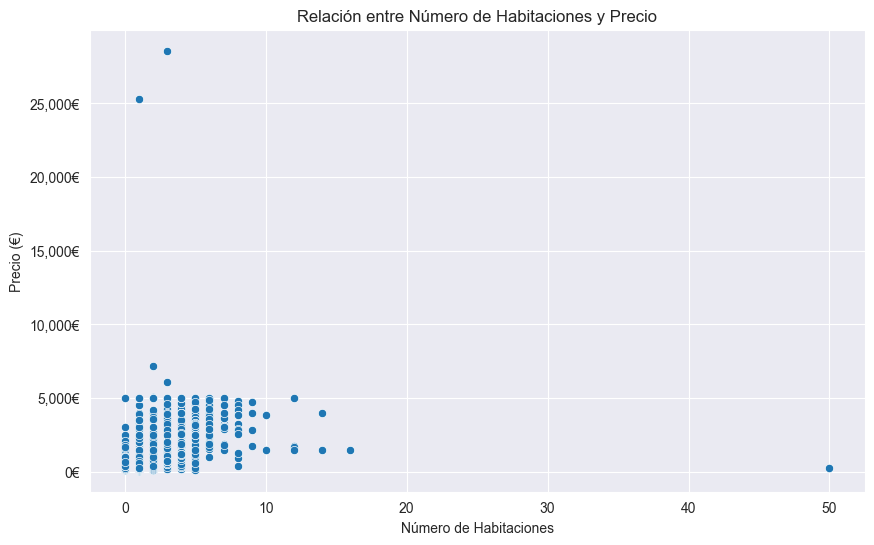

In [20]:
# Relación entre el número de habitaciones y el precio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bedrooms', y='price', data=df)
plt.title('Relación entre Número de Habitaciones y Precio')
plt.xlabel('Número de Habitaciones')
plt.ylabel('Precio (€)')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(euro_formatter))
plt.show()

## 004 Disponibilidad y Estrategias de Marketing
    La disponibilidad es clave, ya que si un alojamiento está constantemente lleno, su visibilidad y estrategias de marketing podrían necesitar ajustes. Además, el análisis de la reserva instantánea también es crucial para optimizar las tasas de conversión.

#### 004-1 Distribución de Disponibilidad en 30 días

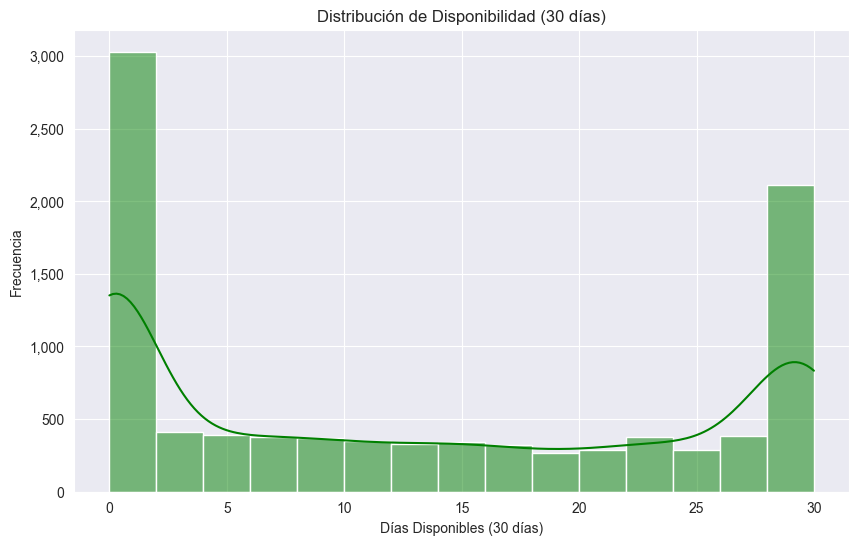

In [21]:
# Histograma de disponibilidad
plt.figure(figsize=(10, 6))
sns.histplot(df['availability_30'], kde=True, color='green')

plt.gca().yaxis.set_major_formatter(FuncFormatter(formato_miles))

plt.title('Distribución de Disponibilidad (30 días)')
plt.xlabel('Días Disponibles (30 días)')
plt.ylabel('Frecuencia')
plt.show()

#### 004-2 Distribución de Disponibilidad en 60 días

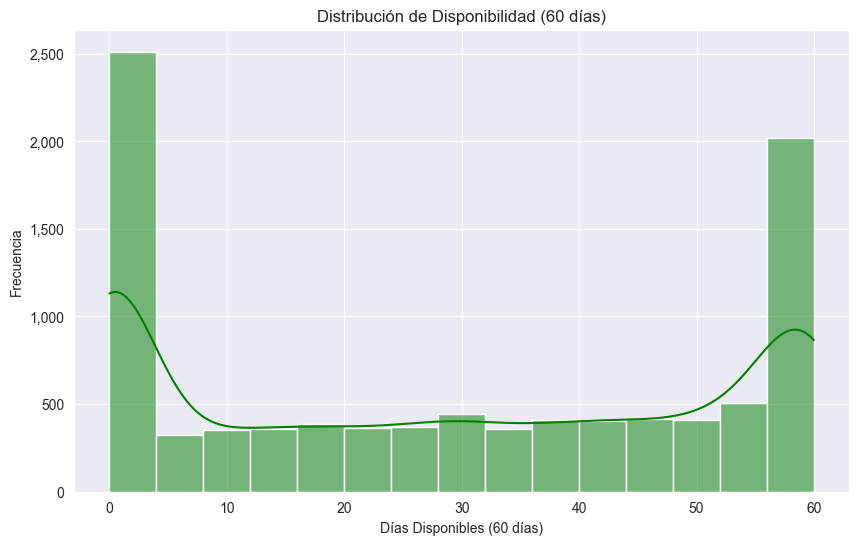

In [22]:
# Histograma de disponibilidad
plt.figure(figsize=(10, 6))
sns.histplot(df['availability_60'], kde=True, color='green')

plt.gca().yaxis.set_major_formatter(FuncFormatter(formato_miles))

plt.title('Distribución de Disponibilidad (60 días)')
plt.xlabel('Días Disponibles (60 días)')
plt.ylabel('Frecuencia')
plt.show()

#### 004-3 Distribución de Disponibilidad en 90 días

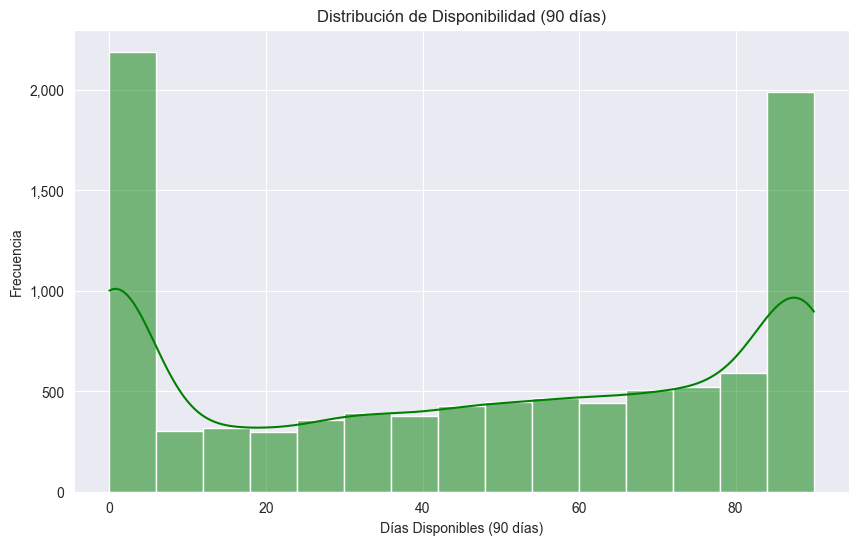

In [23]:
# Histograma de disponibilidad
plt.figure(figsize=(10, 6))
sns.histplot(df['availability_90'], kde=True, color='green')

plt.gca().yaxis.set_major_formatter(FuncFormatter(formato_miles))

plt.title('Distribución de Disponibilidad (90 días)')
plt.xlabel('Días Disponibles (90 días)')
plt.ylabel('Frecuencia')
plt.show()

#### 004-4 Distribución de Disponibilidad en 365 días

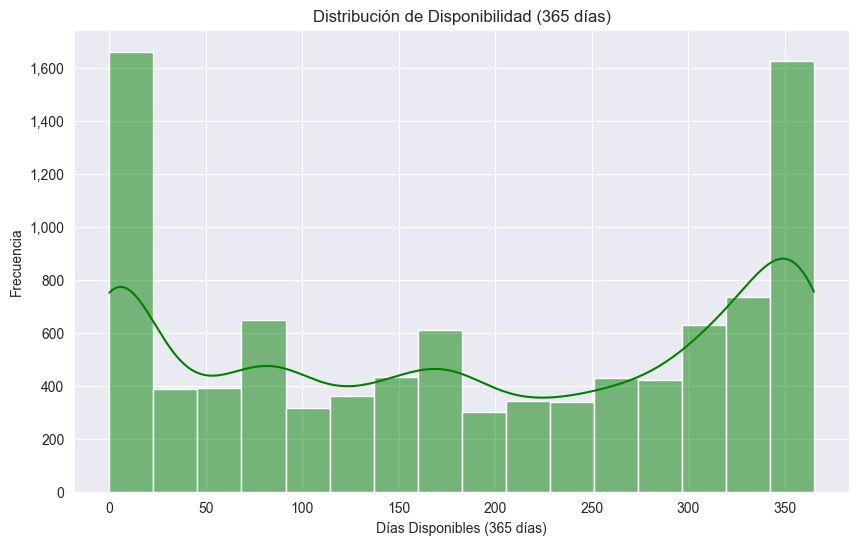

In [24]:
# Histograma de disponibilidad
plt.figure(figsize=(10, 6))
sns.histplot(df['availability_365'], kde=True, color='green')

plt.gca().yaxis.set_major_formatter(FuncFormatter(formato_miles))

plt.title('Distribución de Disponibilidad (365 días)')
plt.xlabel('Días Disponibles (365 días)')
plt.ylabel('Frecuencia')
plt.show()



## 005 Reserva Instantánea y Comunicación
    Verificar cuántos alojamientos permiten la reserva instantánea.
    La reserva instantánea es un factor clave en la experiencia del usuario. Si la mayoría de los alojamientos tienen esta opción, se puede centrar la comunicación en la conveniencia y rapidez del proceso.

### 005-1 Ver el porcentaje de alojamientos con reserva instantánea

In [25]:
instant_bookable_percentage = df['is_instant_bookable'].value_counts(normalize=True) * 100
print(instant_bookable_percentage)

is_instant_bookable
VERDADERO    58.040071
FALSO        41.959929
Name: proportion, dtype: float64


### 005-2 Gráfico de la distribución de alojamientos con reserva instantánea

C:\Users\Albert\AppData\Local\Temp\ipykernel_14232\1596701451.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_instant_bookable', data=df, palette='viridis')


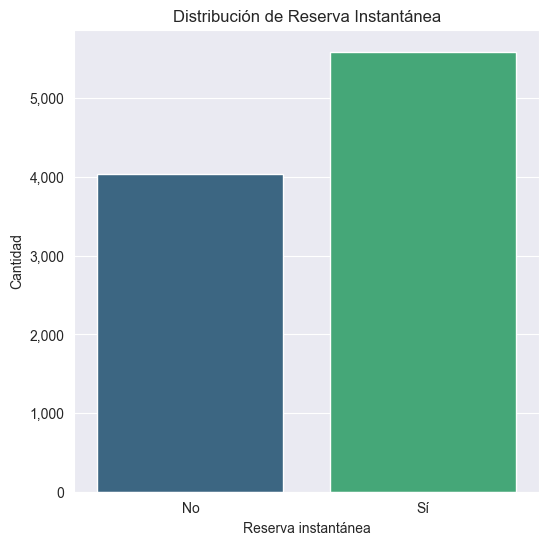

In [29]:
plt.figure(figsize=(6, 6))
sns.countplot(x='is_instant_bookable', data=df, palette='viridis')

plt.gca().yaxis.set_major_formatter(FuncFormatter(formato_miles))

plt.xlabel('Reserva instantánea')
plt.ylabel('Cantidad')
plt.title('Distribución de Reserva Instantánea')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

## 006 Análisis de Reseñas
    Las reseñas son un factor determinante en la decisión del cliente. Vamos a analizar tanto la cantidad de reseñas como la puntuación.

### 006-1 Número de Reseñas y Puntuaciones
    La cantidad de reseñas y la puntuación promedio pueden indicar la popularidad y calidad de los alojamientos.

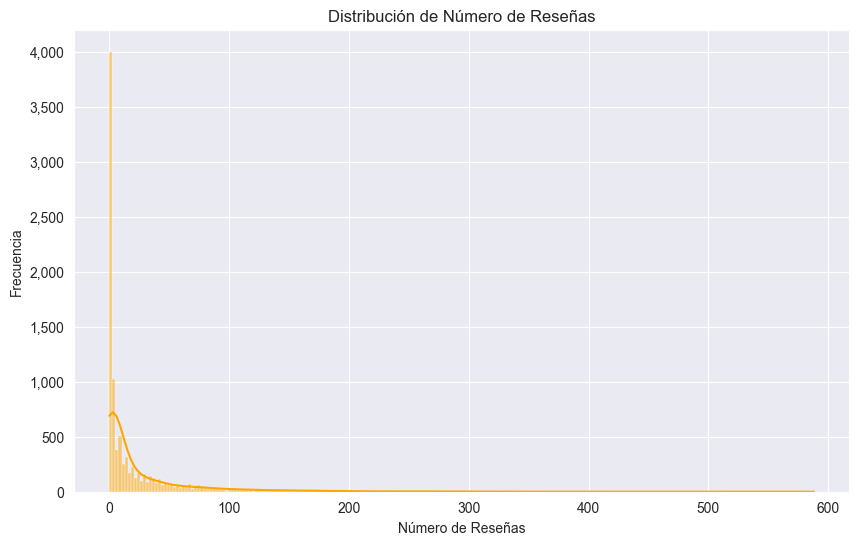

In [30]:
# Histograma de número de reseñas
plt.figure(figsize=(10, 6))
sns.histplot(df['number_of_reviews'], kde=True, color='orange')

plt.gca().yaxis.set_major_formatter(FuncFormatter(formato_miles))

plt.title('Distribución de Número de Reseñas')
plt.xlabel('Número de Reseñas')
plt.ylabel('Frecuencia')
plt.show()


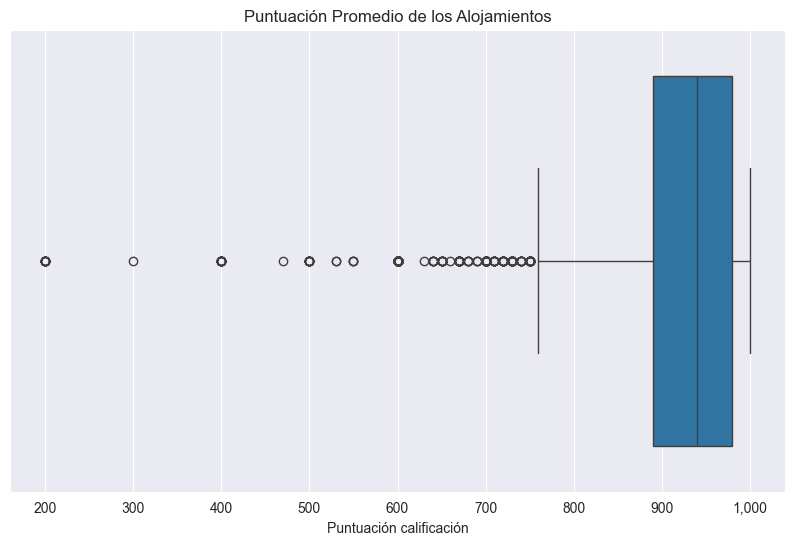

In [31]:
 # Boxplot de puntuaciones
plt.figure(figsize=(10, 6))
sns.boxplot(x='review_scores_rating', data=df)

plt.gca().xaxis.set_major_formatter(FuncFormatter(formato_miles))

plt.xlabel('Puntuación calificación')
plt.title('Puntuación Promedio de los Alojamientos')
plt.show()

### 006-2 Puntuaciones por Tipo de Alojamiento

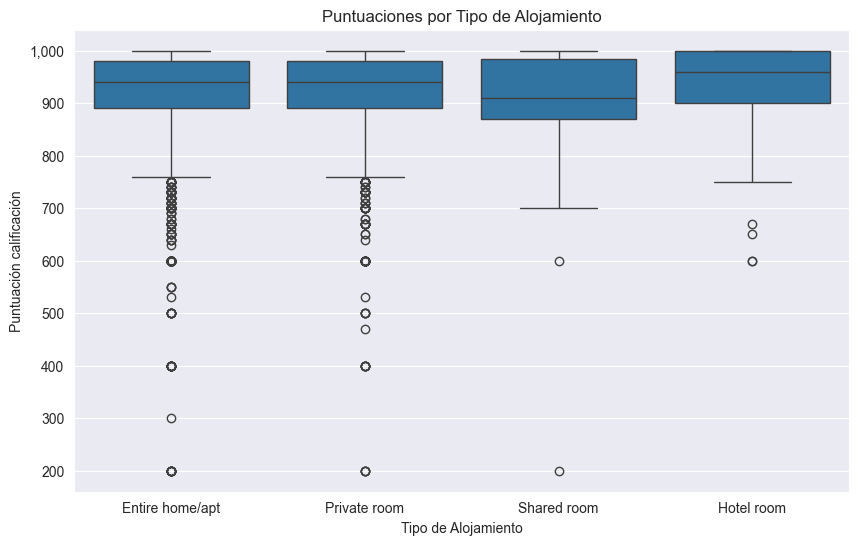

In [32]:
# Boxplot de puntuaciones por tipo de alojamiento
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='review_scores_rating', data=df)

plt.gca().yaxis.set_major_formatter(FuncFormatter(formato_miles))

plt.xlabel('Tipo de Alojamiento')
plt.ylabel('Puntuación calificación')
plt.title('Puntuaciones por Tipo de Alojamiento')
plt.show()

## 007 Geocodificación para obtener las coordenadas (Latitud y Longitud)

In [35]:
# Inicializar el geolocalizador con un user_agent único
geolocator = Nominatim(user_agent="mi_aplicacion_de_geolocalizacion")

# Función para geolocalizar con reintentos
def geocode_with_retry(location_query, retries=3, delay=2):
    for _ in range(retries):
        try:
            location = geolocator.geocode(location_query, timeout=10)  # Intentar obtener las coordenadas
            if location:
                return location.latitude, location.longitude  # Devolver latitud y longitud
            else:
                return None, None  # Si no se encontró la ubicación, devolver None
        except GeocoderTimedOut:
            time.sleep(delay)  # Si hay un error de timeout, esperar y reintentar
    return None, None  # Si los reintentos fallan, devolver None

# Función para aplicar geocode_with_retry al DataFrame
def geocode_location(row, retries=3, delay=2):
    # Verificar que las columnas necesarias no tengan valores nulos
    if pd.notnull(row['neighbourhood_name']) and pd.notnull(row['city']):
        # Si neighbourhood_district es nulo, se omite
        location_query = f"{row['neighbourhood_name']}, {row['neighbourhood_district'] if pd.notnull(row['neighbourhood_district']) else ''}, {row['city']}, España"
        return geocode_with_retry(location_query, retries, delay)
    else:
        return None, None  # Retornar None si alguna columna clave está vacía

# Aplicar la función para obtener latitud y longitud
df[['latitude', 'longitude']] = df.apply(geocode_location, axis=1, result_type="expand")

# Verificar que las coordenadas se han añadido correctamente
print(df[['apartment_id', 'neighbourhood_name', 'neighbourhood_district', 'city', 'country', 'latitude', 'longitude']].head())


KeyboardInterrupt: 

#### 007 Mapa

In [75]:
# Filtrar los apartamentos que tienen latitud y longitud no nulas
df_filtered = df.dropna(subset=['latitude', 'longitude'])

# Verificar que las coordenadas han sido asignadas correctamente
print(df_filtered[['apartment_id', 'neighbourhood_name', 'city', 'latitude', 'longitude', 'price']].head())

   apartment_id               neighbourhood_name       city   latitude  \
0         11964                           Centro     malaga  36.724869   
2         32347                      San Vicente    sevilla  37.395932   
3         35379  l'Antiga Esquerra de l'Eixample  barcelona  41.390000   
4         35801                            Quart     girona  41.940159   
7         71603           la Dreta de l'Eixample  barcelona  41.395037   

   longitude   price  
0  -4.418305   400.0  
2  -5.999576   990.0  
3   2.155000   400.0  
4   2.841352   900.0  
7   2.167207  3900.0  


#### 007-1 Crear mapa de burbujas

In [76]:
# Crear el mapa centrado en una ubicación general (Madrid, España en este caso)
m = folium.Map(location=[40.4168, -3.7038], zoom_start=12)

# Inicializar MarkerCluster para agrupar marcadores cercanos
marker_cluster = MarkerCluster().add_to(m)

# Normalizar el tamaño de las burbujas según el precio
# Dividimos el precio por un factor para hacer los tamaños manejables
df_filtered['bubble_size'] = df_filtered['price'] / 100  # Ajusta el divisor para cambiar el tamaño de la burbuja

# Añadir burbujas (marcadores de círculo) al mapa
for idx, row in df_filtered.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],  # Coordenadas del apartamento
        radius=row['bubble_size'],  # Tamaño de la burbuja en función del precio
        color='blue',  # Color del borde
        fill=True, 
        fill_color='blue',  # Color de relleno
        fill_opacity=0.6,  # Opacidad del relleno
        popup=f"Apartment ID: {row['apartment_id']}<br>Price: {row['price']}€",  # Información en el popup
    ).add_to(marker_cluster)

# Guardar el mapa en un archivo HTML
m.save("mapa_con_burbujas.html")

# Mostrar el mapa en el entorno de trabajo (si usas un notebook Jupyter)
m

C:\Users\Albert\AppData\Local\Temp\ipykernel_10776\3138207387.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['bubble_size'] = df_filtered['price'] / 100  # Ajusta el divisor para cambiar el tamaño de la burbuja


# Pregunta de negocio Sprint-1:
    Analista de Màrqueting i Estratègia Comercial: Quin és el preu mitjà dels allotjaments per tipus
d'allotjament a cada ciutat?

In [36]:
# Agrupar por ciudad y tipo de alojamiento, luego calcular el precio medio
precio_medio = df.groupby(['city', 'room_type'])['price'].mean().reset_index()

# Renombrar las columnas para mayor claridad
precio_medio.columns = ['Ciudad', 'Tipo de alojamiento', 'Precio medio']

# Formatear el precio medio con 2 decimales y separador de miles
precio_medio['Precio medio'] = precio_medio['Precio medio'].apply(lambda x: f"{x:,.2f}€")

# Mostrar los primeros resultados
print(precio_medio.head())



      Ciudad Tipo de alojamiento Precio medio
0  barcelona     Entire home/apt    1,261.57€
1  barcelona          Hotel room    1,150.00€
2  barcelona        Private room      471.48€
3  barcelona         Shared room      451.03€
4     girona     Entire home/apt    1,258.80€


In [37]:
# Mostrar todas los resultados
print(precio_medio)

       Ciudad Tipo de alojamiento Precio medio
0   barcelona     Entire home/apt    1,261.57€
1   barcelona          Hotel room    1,150.00€
2   barcelona        Private room      471.48€
3   barcelona         Shared room      451.03€
4      girona     Entire home/apt    1,258.80€
5      girona          Hotel room      672.73€
6      girona        Private room      680.61€
7      girona         Shared room      150.00€
8      madrid     Entire home/apt      967.60€
9      madrid          Hotel room      842.86€
10     madrid        Private room      479.39€
11     madrid         Shared room      706.67€
12     malaga     Entire home/apt      836.88€
13     malaga          Hotel room      622.50€
14     malaga        Private room      369.46€
15     malaga         Shared room      143.33€
16   mallorca     Entire home/apt    1,787.80€
17   mallorca          Hotel room    1,620.59€
18   mallorca        Private room      882.76€
19   mallorca         Shared room      437.50€
20    menorca

## Código para crear la tabla pivote con el precio medio:

In [38]:
# Agrupar por ciudad y tipo de alojamiento, luego calcular el precio medio
precio_medio = df.groupby(['city', 'room_type'])['price'].mean().reset_index()

# Crear la tabla pivote
tabla_pivote = precio_medio.pivot_table(index='city', columns='room_type', values='price', aggfunc='mean')

# Formatear el precio medio con 2 decimales, separador de miles y símbolo de euro
tabla_pivote = tabla_pivote.applymap(lambda x: f"{x:,.2f}€" if pd.notnull(x) else x)

# Para reemplazar por 0 si NaN
tabla_pivote = tabla_pivote.fillna('0.00€')

# Mostrar la tabla pivote resultante
print(tabla_pivote)

room_type Entire home/apt Hotel room Private room Shared room
city                                                         
barcelona       1,261.57€  1,150.00€      471.48€     451.03€
girona          1,258.80€    672.73€      680.61€     150.00€
madrid            967.60€    842.86€      479.39€     706.67€
malaga            836.88€    622.50€      369.46€     143.33€
mallorca        1,787.80€  1,620.59€      882.76€     437.50€
menorca         1,724.85€      0.00€    1,197.89€       0.00€
sevilla         1,054.34€    819.09€      563.14€     120.00€
valencia          811.23€    770.00€      328.70€     203.33€


🔍 Tabla de precios medios por ciudad y tipo de alojamiento:
room_type Entire home/apt Hotel room Private room Shared room
city                                                         
barcelona       1,261.57€  1,150.00€      471.48€     451.03€
girona          1,258.80€    672.73€      680.61€     150.00€
madrid            967.60€    842.86€      479.39€     706.67€
malaga            836.88€    622.50€      369.46€     143.33€
mallorca        1,787.80€  1,620.59€      882.76€     437.50€
menorca         1,724.85€      0.00€    1,197.89€       0.00€
sevilla         1,054.34€    819.09€      563.14€     120.00€
valencia          811.23€    770.00€      328.70€     203.33€


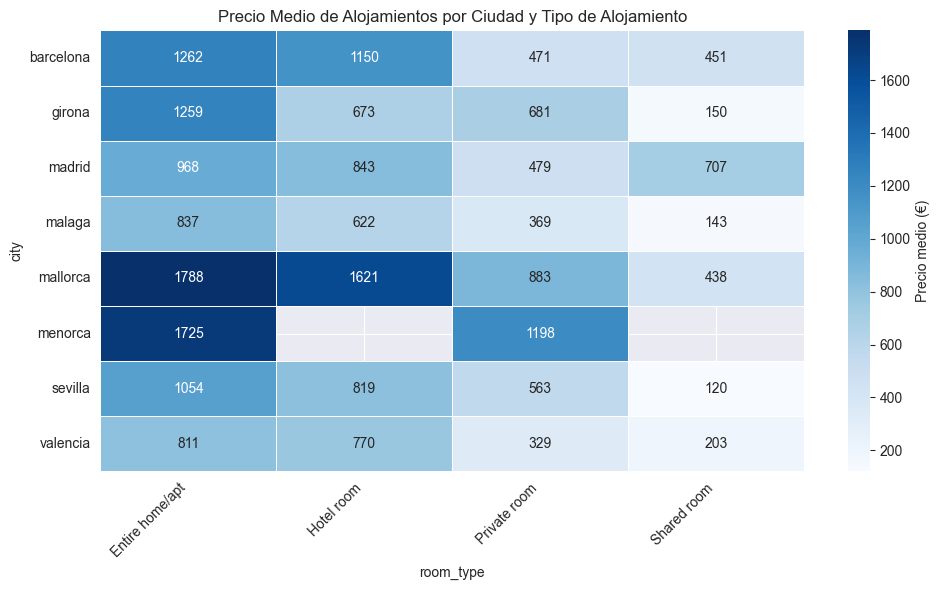

In [39]:
# Agrupar por ciudad y tipo de alojamiento, luego calcular el precio medio
precio_medio = df.groupby(['city', 'room_type'])['price'].mean().reset_index()

# Crear la tabla pivote numérica
tabla_pivote = precio_medio.pivot_table(index='city', columns='room_type', values='price', aggfunc='mean')

# Tabla formateada solo para visualización en consola
tabla_pivote_formateada = tabla_pivote.applymap(lambda x: f"{x:,.2f}€" if pd.notnull(x) else '0.00€')
print("🔍 Tabla de precios medios por ciudad y tipo de alojamiento:")
print(tabla_pivote_formateada)

# Graficar usando la tabla numérica
plt.figure(figsize=(10, 6))
sns.heatmap(tabla_pivote, annot=True, fmt='.0f', cmap='Blues', linewidths=0.5, cbar_kws={'label': 'Precio medio (€)'})
plt.title('Precio Medio de Alojamientos por Ciudad y Tipo de Alojamiento')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Pregunta de negocio Sprint-2:
    Quines característiques dels allotjaments (comoditats, capacitat i puntuació de la zona) estan més relacionades amb els preus a cada ciutat?

## Consultas: Analizar disponibilidad

In [40]:
# Calcular la disponibilidad media por ciudad
df_grouped = df.groupby('city')['availability_30'].mean()

# Redondear al entero más cercano
df_grouped_rounded = df_grouped.round(0).astype(int)

# Mostrar el resultado
print(df_grouped_rounded)

city
barcelona    12
girona       15
madrid       12
malaga       13
mallorca     14
menorca      14
sevilla      15
valencia     13
Name: availability_30, dtype: int32


## 1. Análisis de correlación general por ciudad
    Esto dará, para cada ciudad, qué variables tienen mayor correlación con el precio.

In [41]:
# Seleccionem les columnes rellevants
columnes_interessants = ['city', 'price', 'accommodates', 'bedrooms', 'beds', 'bathrooms', 'review_scores_location']
df_corr = df[columnes_interessants].dropna()

# Calcular la correlació per ciutat
for ciutat in df_corr['city'].unique():
    print(f"\n📍 Ciutat: {ciutat.upper()}")
    sub_df = df_corr[df_corr['city'] == ciutat]
    correlacions = sub_df.corr(numeric_only=True)['price'].drop('price').sort_values(ascending=False)
    print(correlacions)



📍 Ciutat: GIRONA
bedrooms                  0.636089
accommodates              0.631433
bathrooms                 0.594200
beds                      0.590282
review_scores_location    0.036720
Name: price, dtype: float64

📍 Ciutat: MALAGA
bedrooms                  0.529596
accommodates              0.520961
beds                      0.476394
bathrooms                 0.429480
review_scores_location    0.105608
Name: price, dtype: float64

📍 Ciutat: SEVILLA
accommodates              0.321542
beds                      0.273175
bedrooms                  0.257485
bathrooms                 0.233448
review_scores_location    0.085625
Name: price, dtype: float64

📍 Ciutat: MENORCA
bathrooms                 0.638240
accommodates              0.608181
bedrooms                  0.510102
beds                      0.406176
review_scores_location    0.046626
Name: price, dtype: float64

📍 Ciutat: VALENCIA
accommodates              0.480327
beds                      0.473672
bedrooms                

#### Idem anterior corrección comentarios Abelardo
    Este código:
    1.- Transforma amenities_list a una variable numérica (amenities_count).

    2.- Filtra columnas relevantes.

    3.- Calcula la correlación entre el price y las demás variables, por ciudad.

    4.- Ordena los resultados para ver cuál variable está más correlacionada con el precio en cada ciudad.

In [42]:
# Crear nueva columna numérica a partir de amenities_list
df['amenities_count'] = df['amenities_list'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)

# Columnas que queremos correlacionar con el precio
columnes_interessants = ['city', 'price', 'accommodates', 'amenities_count', 'review_scores_location']
df_corr = df[columnes_interessants].dropna()

# Calcular la correlació per ciutat
for ciutat in df_corr['city'].unique():
    print(f"\n📍 Ciutat: {ciutat.upper()}")
    sub_df = df_corr[df_corr['city'] == ciutat]
    correlacions = sub_df.corr(numeric_only=True)['price'].drop('price').sort_values(ascending=False)
    print(correlacions)


📍 Ciutat: GIRONA
accommodates              0.633069
amenities_count           0.102440
review_scores_location    0.036919
Name: price, dtype: float64

📍 Ciutat: MALAGA
accommodates              0.521112
review_scores_location    0.104167
amenities_count           0.102499
Name: price, dtype: float64

📍 Ciutat: SEVILLA
accommodates              0.323816
review_scores_location    0.083445
amenities_count          -0.058829
Name: price, dtype: float64

📍 Ciutat: MENORCA
accommodates              0.607040
amenities_count           0.109478
review_scores_location    0.054822
Name: price, dtype: float64

📍 Ciutat: VALENCIA
accommodates              0.481587
review_scores_location    0.062820
amenities_count           0.040214
Name: price, dtype: float64

📍 Ciutat: MALLORCA
accommodates              0.617416
amenities_count           0.116766
review_scores_location   -0.028777
Name: price, dtype: float64

📍 Ciutat: BARCELONA
accommodates              0.646930
amenities_count           0.1998

### Paso 1: Calcular correlación por ciudad (capacidad, comodidades, puntuación de zona)

In [44]:
# Crear nueva columna numérica a partir de amenities_list
df['amenities_count'] = df['amenities_list'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)

# Variables a analizar incluyendo amenities_count
vars_interes = ['accommodates', 'amenities_count', 'review_scores_location']

# Crear un DataFrame vacío para guardar las correlaciones
correlations_by_city = pd.DataFrame()

# Calcular correlaciones por ciudad
for city in df['city'].dropna().unique():
    sub_df = df[df['city'] == city]
    
    # Verificamos que haya suficientes datos válidos para calcular correlaciones
    if sub_df[vars_interes + ['price']].dropna().shape[0] >= 2:
        corr = sub_df[vars_interes + ['price']].corr(numeric_only=True)['price'].drop('price')
        correlations_by_city[city.upper()] = corr

# Transponer para que las ciudades queden como índice
correlations_by_city = correlations_by_city.T

# Mostrar el DataFrame
print(correlations_by_city)


           accommodates  amenities_count  review_scores_location
GIRONA         0.607764         0.107237                0.036919
MENORCA        0.571994         0.059184                0.054822
MALAGA         0.526844         0.049004                0.104167
SEVILLA        0.339966        -0.077912                0.083445
VALENCIA       0.527983         0.039474                0.062820
MALLORCA       0.413477         0.026683               -0.028777
BARCELONA      0.625356         0.193674               -0.015372
MADRID         0.422751         0.057456                0.105204


### Paso 2: Visualizar tabla con fondo de color dinámico

In [46]:
styled_corr = correlations_by_city.style\
    .background_gradient(cmap='YlGnBu')\
    .format("{:.2f}")\
    .set_caption("📊 Correlació entre característiques i preu per ciutat")

styled_corr

##  2. Análisis de comodidades (“amenities”) relacionadas con el precio
    Podemos analizar si ciertos servicios (como WiFi, aire acondicionado, parking, etc.) están asociados a precios más altos. Suponiendo que normalized_amenities es una lista:

### Código para crear normalized_amenities

In [47]:
# Función de limpieza básica
def limpiar_amenities(x):
    if pd.isna(x):
        return ''
    # Eliminar corchetes, comillas, espacios extra y convertir a minúsculas
    x = x.replace('[', '').replace(']', '').replace('"', '').replace("'", '')
    x = x.lower()
    return ', '.join(sorted(set([i.strip() for i in x.split(',')])))

# Crear columna 'normalized_amenities'
df['normalized_amenities'] = df['amenities_list'].apply(limpiar_amenities)

In [48]:
# Creamos una matriz binaria de presencia/ausencia de comodidades
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(", "))
amenities_matrix = vectorizer.fit_transform(df['normalized_amenities'].fillna(''))

# Convertir a DataFrame
amenities_df = pd.DataFrame(amenities_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Añadir la columna de precio
amenities_df['price'] = df['price'].values

# Correlación entre cada amenity y el precio
correlacions_amenities = amenities_df.corr(numeric_only=True)['price'].drop('price').sort_values(ascending=False)

# Mostrar los 10 amenities con mayor correlación positiva con el precio
print("\n🏷️ Comoditats amb més correlació positiva amb el preu:")
print(correlacions_amenities.head(15))

c:\Users\Albert\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



🏷️ Comoditats amb més correlació positiva amb el preu:
pool                        0.380342
indoor fireplace            0.272083
free parking on premises    0.264435
bbq grill                   0.230239
high chair                  0.221014
crib                        0.209419
dishwasher                  0.200141
garden or backyard          0.196758
tv                          0.182835
bathtub                     0.167919
private entrance            0.153428
family/kid friendly         0.152548
cable tv                    0.152402
air conditioning            0.149891
dryer                       0.143684
Name: price, dtype: float64


### Paso 3: Calcular correlación entre comodidades y precio

In [49]:
# Limpiar datos y crear la matriz de comodidades
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(", "))
amenities_matrix = vectorizer.fit_transform(df['amenities_list'].fillna(''))

# Convertir a DataFrame
amenities_df = pd.DataFrame(amenities_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Añadir precios
amenities_df['price'] = df['price'].values

# Calcular correlación
correlation_series = amenities_df.corr()['price'].drop('price').sort_values(ascending=False)

# Convertir a DataFrame para visualización
amenities_corr_df = correlation_series.reset_index()
amenities_corr_df.columns = ['Amenidad', 'Correlación con el precio']

c:\Users\Albert\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


### Paso 4: Mostrar tabla formateada (comodidades)
    Solo las 15 primeras filas

In [50]:
styled_amenities = amenities_corr_df.sort_values(by='Correlación con el precio', ascending=False).head(15).style\
    .background_gradient(subset=['Correlación con el precio'], cmap='Oranges')\
    .format({'Correlación con el precio': "{:.2f}"})\
    .set_caption("🛋️ Comoditats amb més correlació amb el preu")

styled_amenities

# KPI 1 - Tasa de ocupación mensual

In [62]:
# Suponiendo que 'availability_30' es el número de días disponibles en los últimos 30 días

# Calcular el número de días ocupados
df['days_occupied'] = 30 - df['availability_30']  # Si 'availability_30' tiene los días disponibles, restamos a 30

# Calcular la tasa de ocupación mensual
df['occupancy_rate'] = (df['days_occupied'] / 30) * 100  # Tasa de ocupación en porcentaje

# Mostrar las primeras filas con el KPI calculado
print(df[['apartment_id', 'city', 'room_type', 'availability_30', 'days_occupied', 'occupancy_rate']].head())


   apartment_id     city        room_type  availability_30  days_occupied  \
0      15248525   girona  Entire home/apt               30              0   
1      44391173   girona     Private room               30              0   
2      32088176   girona  Entire home/apt                0             30   
3      45803831  menorca  Entire home/apt                1             29   
4      43993521   girona  Entire home/apt               27              3   

   occupancy_rate  
0        0.000000  
1        0.000000  
2      100.000000  
3       96.666667  
4       10.000000  


In [64]:
# Agrupar por ciudad y tipo de alojamiento y calcular la tasa de ocupación promedio
kpi_occupancy = df.groupby(['city'])['occupancy_rate'].mean().reset_index()

# Formatear el 'occupancy_rate' a porcentaje con 2 decimales
kpi_occupancy['occupancy_rate'] = kpi_occupancy['occupancy_rate'].apply(lambda x: f"{x:.2f}%")

# Calcular el promedio global de ocupación (porcentaje de ocupación total)
total_occupancy_rate = df['occupancy_rate'].mean()


# Mostrar el KPI por ciudad y tipo de alojamiento
print("Tasa de ocupación por ciudad y tipo de alojamiento:")
print(kpi_occupancy)

# Mostrar el porcentaje de ocupación total
print(f"\nTasa de ocupación total: {total_occupancy_rate:.2f}%")

Tasa de ocupación por ciudad y tipo de alojamiento:
        city occupancy_rate
0  barcelona         60.06%
1     girona         50.47%
2     madrid         60.88%
3     malaga         57.21%
4   mallorca         53.52%
5    menorca         52.23%
6    sevilla         50.74%
7   valencia         55.50%

Tasa de ocupación total: 56.64%


## KPI 1 - Tasa de ocupación por tipo de alojamiento:
    KPI de ocupación promedio por ciudad y tipo de alojamiento.

In [53]:
# Agrupar por ciudad y tipo de alojamiento y calcular la tasa de ocupación promedio
kpi_occupancy = df.groupby(['city', 'room_type'])['occupancy_rate'].mean().reset_index()

# Formatear el 'occupancy_rate' a porcentaje con 2 decimales
kpi_occupancy['occupancy_rate'] = kpi_occupancy['occupancy_rate'].apply(lambda x: f"{x:.2f}%")

# Mostrar el KPI por ciudad y tipo de alojamiento
print(kpi_occupancy)

         city        room_type occupancy_rate
0   barcelona  Entire home/apt         61.89%
1   barcelona       Hotel room         61.75%
2   barcelona     Private room         58.99%
3   barcelona      Shared room         33.33%
4      girona  Entire home/apt         51.00%
5      girona       Hotel room         50.91%
6      girona     Private room         41.95%
7      girona      Shared room          0.00%
8      madrid  Entire home/apt         61.14%
9      madrid       Hotel room         51.19%
10     madrid     Private room         61.33%
11     madrid      Shared room         42.11%
12     malaga  Entire home/apt         57.09%
13     malaga       Hotel room         30.00%
14     malaga     Private room         58.30%
15     malaga      Shared room         76.67%
16   mallorca  Entire home/apt         53.82%
17   mallorca       Hotel room         72.75%
18   mallorca     Private room         48.39%
19   mallorca      Shared room         57.50%
20    menorca  Entire home/apt    

## KPI 1 - Tasa de ocupación agrupada por ciudad y tipo de alojamiento en %

In [54]:
# Agrupar por ciudad y tipo de alojamiento y calcular la tasa de ocupación promedio
kpi_occupancy = df.groupby(['city', 'room_type'])['occupancy_rate'].mean().reset_index()

# Formatear el 'occupancy_rate' a porcentaje con 2 decimales
kpi_occupancy['occupancy_rate'] = kpi_occupancy['occupancy_rate'].apply(lambda x: f"{x:.2f}%")

# Mostrar el KPI por ciudad y tipo de alojamiento
print(kpi_occupancy)


         city        room_type occupancy_rate
0   barcelona  Entire home/apt         61.89%
1   barcelona       Hotel room         61.75%
2   barcelona     Private room         58.99%
3   barcelona      Shared room         33.33%
4      girona  Entire home/apt         51.00%
5      girona       Hotel room         50.91%
6      girona     Private room         41.95%
7      girona      Shared room          0.00%
8      madrid  Entire home/apt         61.14%
9      madrid       Hotel room         51.19%
10     madrid     Private room         61.33%
11     madrid      Shared room         42.11%
12     malaga  Entire home/apt         57.09%
13     malaga       Hotel room         30.00%
14     malaga     Private room         58.30%
15     malaga      Shared room         76.67%
16   mallorca  Entire home/apt         53.82%
17   mallorca       Hotel room         72.75%
18   mallorca     Private room         48.39%
19   mallorca      Shared room         57.50%
20    menorca  Entire home/apt    

## KPI 1 - Matriz Tasa de ocupación por ciudad y tipo de alojamientos en %

In [65]:
# Agrupar por ciudad y tipo de alojamiento y calcular la tasa de ocupación promedio
kpi_occupancy = df.groupby(['city', 'room_type'])['occupancy_rate'].mean().reset_index()

# Formatear el 'occupancy_rate' a porcentaje con 2 decimales
kpi_occupancy['occupancy_rate'] = kpi_occupancy['occupancy_rate'].apply(lambda x: f"{x:.2f}%")

# Convertir el dataframe a una matriz con las ciudades como filas y los tipos de alojamiento como columnas
occupancy_matrix = kpi_occupancy.pivot_table(index='city', columns='room_type', values='occupancy_rate', aggfunc='first')

# Para reemplazar por 0 si NaN
occupancy_matrix = occupancy_matrix.fillna('0.00%')

# Convertir a formato tabla con tabulate para una mejor visualización en rejilla
occupancy_matrix_formatted = tabulate(occupancy_matrix, headers='keys', tablefmt='grid', showindex=True)

# Mostrar la tabla en formato rejilla
print(occupancy_matrix_formatted)

+-----------+-------------------+--------------+----------------+---------------+
| city      | Entire home/apt   | Hotel room   | Private room   | Shared room   |
+===========+===================+==============+================+===============+
| barcelona | 61.89%            | 61.75%       | 58.99%         | 33.33%        |
+-----------+-------------------+--------------+----------------+---------------+
| girona    | 51.00%            | 50.91%       | 41.95%         | 0.00%         |
+-----------+-------------------+--------------+----------------+---------------+
| madrid    | 61.14%            | 51.19%       | 61.33%         | 42.11%        |
+-----------+-------------------+--------------+----------------+---------------+
| malaga    | 57.09%            | 30.00%       | 58.30%         | 76.67%        |
+-----------+-------------------+--------------+----------------+---------------+
| mallorca  | 53.82%            | 72.75%       | 48.39%         | 57.50%        |
+-----------+---

## KPI 1 - Matriz Tasa de ocupación por ciudad y tipo de alojamientos en % con total fila y columna

In [66]:
# Agrupar por ciudad y tipo de alojamiento y calcular la tasa de ocupación promedio
kpi_occupancy = df.groupby(['city', 'room_type'])['occupancy_rate'].mean().reset_index()

# Crear matriz pivot (sin formatear aún)
occupancy_matrix = kpi_occupancy.pivot_table(index='city', columns='room_type', values='occupancy_rate', aggfunc='mean')

# Rellenar NaNs con 0.0 para cálculos
occupancy_matrix = occupancy_matrix.fillna(0.0)

# Agregar promedio por fila (ciudad)
occupancy_matrix['Total'] = occupancy_matrix.mean(axis=1)

# Calcular promedio por columna (incluyendo Total)
total_row = occupancy_matrix.mean(axis=0).to_frame().T
total_row.index = ['Total']

# Agregar la fila 'Total' con pd.concat
occupancy_matrix = pd.concat([occupancy_matrix, total_row])

# Formatear todos los valores como porcentajes con 2 decimales
occupancy_matrix = occupancy_matrix.applymap(lambda x: f"{x / 100:.2%}")

# Mostrar la tabla formateada
occupancy_matrix_formatted = tabulate(occupancy_matrix, headers='keys', tablefmt='grid', showindex=True)
print(occupancy_matrix_formatted)

+-----------+-------------------+--------------+----------------+---------------+---------+
|           | Entire home/apt   | Hotel room   | Private room   | Shared room   | Total   |
+===========+===================+==============+================+===============+=========+
| barcelona | 61.89%            | 61.75%       | 58.99%         | 33.33%        | 53.99%  |
+-----------+-------------------+--------------+----------------+---------------+---------+
| girona    | 51.00%            | 50.91%       | 41.95%         | 0.00%         | 35.97%  |
+-----------+-------------------+--------------+----------------+---------------+---------+
| madrid    | 61.14%            | 51.19%       | 61.33%         | 42.11%        | 53.94%  |
+-----------+-------------------+--------------+----------------+---------------+---------+
| malaga    | 57.09%            | 30.00%       | 58.30%         | 76.67%        | 55.51%  |
+-----------+-------------------+--------------+----------------+---------------

# KPI 2 - Ciudad con mayor ocupación mensual.

In [67]:
# La tasa de ocupación mensual ya la tenemos calculada

# Agrupar por ciudad y calcular la tasa de ocupación promedio mensual
occupancy_by_city = df.groupby('city')['occupancy_rate'].mean().reset_index()

# Encontrar la ciudad con mayor tasa de ocupación mensual
max_occupancy_city = occupancy_by_city.loc[occupancy_by_city['occupancy_rate'].idxmax()]

# Mostrar la ciudad con mayor ocupación
print(f"La ciudad con mayor ocupación mensual es {max_occupancy_city['city']} con una tasa de ocupación del {max_occupancy_city['occupancy_rate']:.2f}%")



La ciudad con mayor ocupación mensual es madrid con una tasa de ocupación del 60.88%
